In [1]:
# Importing all necessary packes that will bw used to draw the map

import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio

In [2]:
"""Accessing the path of of the dataset. NB: Use the file path of where the dataset is residing in your PC. Hint: click 
windows + r, drag and drop the file in the window wizard that has opened (for window users).""" 

countries_path = r'C:\Users\HP\Documents\Computer Science\Map_vs_Articles\new\new_map.csv'

In [3]:
# Rendering the datset and reading it, so as it can be accessible in this file

df = pd.read_csv(countries_path)

In [4]:
# showing how dataset looks like

df

,research country/ies in Africa,number of articles
0,Nigeria,35
1,Ethiopia,10
2,Egypt,2
3,Democratic Republic of the Congo,10
4,Tanzania,8
5,South Africa,82
6,Kenya,22
7,Uganda,6
8,Algeria,4
9,Sudan,0


In [5]:
# Getting built in dataset of world map from geopandas

world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

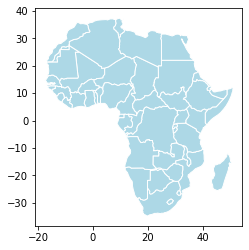

In [6]:
#plot africa map to check if we were able to retrieve it

axis = world_data[world_data.continent == 'Africa'].plot(
color = 'lightblue', edgecolor = 'white')

In [7]:
#setting images to be shown in the new tab for the notebook not be overloaded with the space of images

pio.renderers.default = 'browser'

In [8]:
"""Finally passing the values that will be used in the map. For locations we pass our countries in the database (the column in 
the df as shown above). We limited the scope to be Afica because the built in map is the world map, to see the map clearly we
have limited that, and the color means what will be considered while coloring the locations, which the number of articles. This
means that locations will be colores according to the number of articles they have.  """


f = px.choropleth(df, locationmode = 'country names',
                 locations = df['research country/ies in Africa'],
                 scope = 'africa', # limits map scope to Africa)
                 color = df['number of articles'])

f.update_geos(
    resolution=50,
    showlakes = False
)


f.show()

In [9]:
""" The following is going to generate the second map with the start of zero colored by a very light blue which can enhance 
the visualisation as the color becomes darker. """

fig = go.Figure(data=go.Choropleth(
                locations = df['research country/ies in Africa'],
                z = df['number of articles'],
                locationmode = 'country names',
                colorscale = 'blues',
                colorbar_title = 'number of articles'))

In [10]:
fig.update_geos(
    resolution=50,
    showlakes = False,
    scope = 'africa'
)
fig.update_layout(height=500, margin={"r":0,"t":40,"l":0,"b":0})